# Visualizing FordGoBike Data

## June 2017 - December 2017

# Preliminary Wrangling

My investigation was desgined to study the effect of differents fact on the Ford GoBike system (FGS). The database includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data was uploaded on this link https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import glob
import os
import math
import datetime

In [2]:
ds_inv = pd.read_csv('2017ford.csv')
ds_inv.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


# Discovering data

In [3]:
ds_inv.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
259785,1237,2017-10-09 20:47:49.3040,2017-10-09 21:08:26.4250,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,105,16th St at Prosper St,37.764285,-122.431804,56,Subscriber,1984.0,Male
438814,524,2017-08-15 09:17:45.0600,2017-08-15 09:26:29.3330,197,El Embarcadero at Grand Ave,37.808848,-122.249680,201,10th St at Fallon St,37.797673,-122.262997,2483,Customer,NaN,NaN
329023,454,2017-09-20 08:16:23.8860,2017-09-20 08:23:58.6300,58,Market St at 10th St,37.776619,-122.417385,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,642,Subscriber,1993.0,Male
189163,609,2017-10-30 09:21:17.0700,2017-10-30 09:31:26.2480,45,5th St at Howard St,37.781752,-122.405127,14,Clay St at Battery St,37.795001,-122.399970,369,Customer,1983.0,Male
459028,530,2017-08-07 09:03:02.9140,2017-08-07 09:11:53.2000,29,O'Farrell St at Divisadero St,37.782405,-122.439446,40,Laguna St at McAllister St,37.779208,-122.426829,1647,Customer,1995.0,Male
225244,1413,2017-10-19 18:44:55.1640,2017-10-19 19:08:28.9000,16,Steuart St at Market St,37.794130,-122.394430,114,Rhode Island St at 17th St,37.764478,-122.402570,2443,Subscriber,1973.0,Male
253224,139,2017-10-11 17:06:52.4920,2017-10-11 17:09:12.3530,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,209,45th St at MLK Jr Way,37.833558,-122.267418,1512,Subscriber,1990.0,Female
50842,648,2017-12-11 15:55:07.4850,2017-12-11 16:05:55.9310,238,MLK Jr Way at University Ave,37.871719,-122.273068,263,Channing Way at San Pablo Ave,37.862827,-122.290230,3230,Customer,NaN,NaN
357179,230,2017-09-12 07:31:55.7750,2017-09-12 07:35:45.9320,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,1789,Customer,NaN,NaN
88207,537,2017-11-30 16:20:07.3270,2017-11-30 16:29:04.6300,280,San Fernando at 7th St,37.337246,-121.883074,312,San Jose Diridon Station,37.329732,-121.901782,3087,Subscriber,1996.0,Male


In [4]:
ds_inv.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

In [5]:
ds_inv.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [6]:
ds_inv.shape

(519700, 15)

In [7]:
ds_inv.duplicated().sum() # to check duplication

0

In [8]:
ds_inv.isna().sum() # to cheack any non value

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

## <b> What is the structure of your dataset?
The dataset includes:
<li> duration sec 
<li> start time
<li>    end time
<li>    start station id
<li>    start station name
<li>    start station latitude
<li>    start station longitude
<li>    end station id
<li>    end station name
<li>    end station latitude
<li>    end station longitude 
    <li>    bike id

<li>    member birth year
<li>    member gender
        <li>    user type

There are 519700 rows and 15 columns



## What is/are the main feature(s) of interest in your dataset?
My investigation aims to look at the difference between customers and subscribers according to sex, age, length and distance of the ride

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The data set contains member birth year so it will be easy to extract age. Also, I can extract the lenght amd distance from latitude and longitude. 

# Cleaning the data

In [9]:
ds = ds_inv.copy() # make copy

#### Remove useless columns 

In [10]:
ds.drop(columns =['end_station_id', 'end_station_name'], inplace=True)

#### Remove the rows do not have sex or birth year

In [11]:
ds.dropna(subset = ['member_birth_year', 'member_gender'], inplace=True)

#### Add age column 

In [12]:
ds['age'] = 2020-ds['member_birth_year'].astype('int')

In [13]:
#Check max and min age
ds.age.max(), ds.age.min()

(134, 21)

In [14]:
#age (>80)
ds_age= ds[ds['age'] > 80]

In [15]:
#Exclude unreasonable >80 (747 rows)
ds = ds.drop(ds_age.index, axis=0)

In [16]:
ds.shape

(452412, 14)

#### Alterate date type 

In [17]:
#User_type and Gender to category type
ds.user_type = ds.user_type.astype('category')
ds.member_gender = ds.member_gender.astype('category')

In [18]:
#Start_time and End_time to datetime
ds['start_time'] = pd.to_datetime(ds['start_time'])
ds['end_time'] = pd.to_datetime(ds['end_time'])

In [19]:
#Duration_sec to hours
ds['duration_hours'] = ds['duration_sec'] / 3600

In [20]:
ds['duration_m'] = ds['duration_sec'] / 60

#### Allocate month and day of the start time

In [21]:
ds['start_time_month']=ds['start_time'].dt.strftime('%B')
ds.start_time_month = ds.start_time_month.astype('category')
ds['start_time_day']=ds['start_time'].dt.strftime('%a')
ds.start_time_day = ds.start_time_day.astype('category')

#### Add distance column 

In [22]:
def distance(origin, destination):
    x1, y1 = origin
    x2, y2 = destination
    radius = 6371 # km
    lat = math.radians(x2-x1)
    lon = math.radians(y2-y1)
    a = math.sin(lat/2) * math.sin(lat/2) + math.cos(math.radians(x1)) * math.cos(math.radians(x2)) * math.sin(lon/2) * math.sin(lon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    Dis = radius * c
    return Dis

In [24]:
ds['distance_km'] = ds.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)

#### Check

In [25]:
ds

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,age,duration_hours,duration_m,start_time_month,start_time_day,distance_km
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,37.778768,-122.415929,96,Customer,1987.0,Male,33,22.252778,1335.166667,December,Sun,1.155357
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,37.766210,-122.426614,88,Customer,1965.0,Female,55,21.888889,1313.333333,December,Sun,3.070483
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,37.867789,-122.265896,3167,Subscriber,1997.0,Female,23,12.111944,726.716667,December,Sun,0.795410
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,37.866249,-122.299371,3539,Customer,1991.0,Female,29,1.251944,75.116667,December,Sun,0.000000
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,37.789677,-122.390428,2311,Subscriber,1990.0,Male,30,0.606389,36.383333,December,Sun,0.961503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.528,2017-06-28 10:08:10.438,81,Berry St at 4th St,37.775880,-122.393170,37.781752,-122.405127,400,Subscriber,1991.0,Male,29,0.120833,7.250000,June,Wed,1.374817
519696,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.778742,-122.392741,37.780146,-122.403071,316,Subscriber,1973.0,Male,47,0.119722,7.183333,June,Wed,1.151688
519697,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,37.782411,-122.392706,240,Subscriber,1985.0,Female,35,0.117778,7.066667,June,Wed,0.998476
519698,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.776619,-122.417385,37.774814,-122.418954,669,Subscriber,1981.0,Male,39,0.101667,6.100000,June,Wed,0.204976


# Analysing 
## Univariate Exploration of Data

### Factor1: User gender

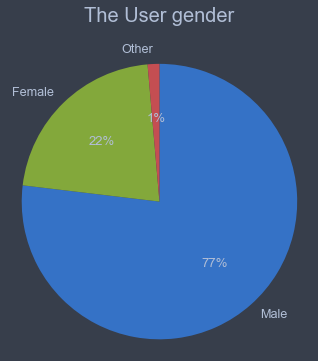

In [27]:
sorted_counts = ds['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False,  autopct='%1.0f%%');
plt.title("The User gender", fontsize=20, y=1.07)
plt.axis('square');

<b> <li> 77% of FGS Users were male and 22% was female.

### Factor 2: Age

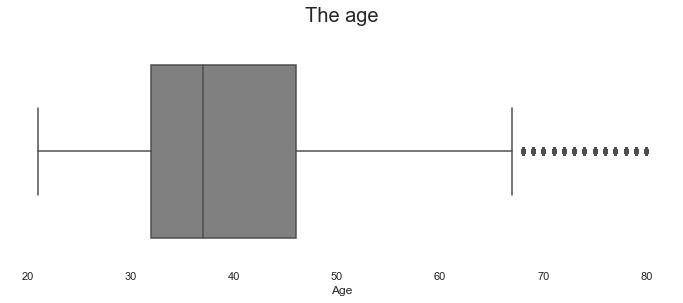

In [46]:
plt.figure(figsize=(12,4))
sb.boxplot(x='age', data= ds, color='gray')
sb.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.title("The age", fontsize=20, y=1.07)
plt.xlabel("Age");

In [45]:
ds.age.describe()

count    452412.000000
mean         39.490005
std          10.177273
min          21.000000
25%          32.000000
50%          37.000000
75%          46.000000
max          80.000000
Name: age, dtype: float64

<b> <li> Age min 21 and max was 80 and the age mean was 39.4

### Factor 3: The user type

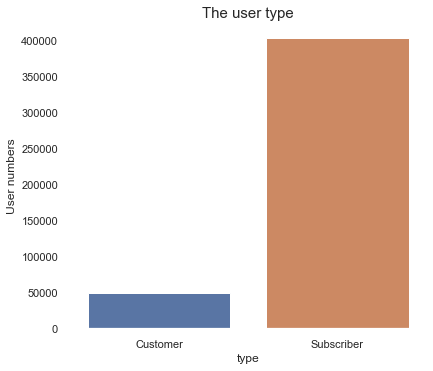

In [58]:
sb.countplot(data = ds, x = 'user_type')
plt.title("The user type", fontsize=15, y=1)
plt.xlabel('type')
plt.ylabel('User numbers');

<b> <li> The data involved 50K customers and more than 400K subscribers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


The age was calculated and gave an unreasonable number. The age max reached to 135 years old. The unit of duration was sec so I built a new column to present duration by min. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


I excluded all rows showing age more than 80 years old to get logical analysis and realistic. 

## Bivariate Exploration

1. <b> Daily using according to User type

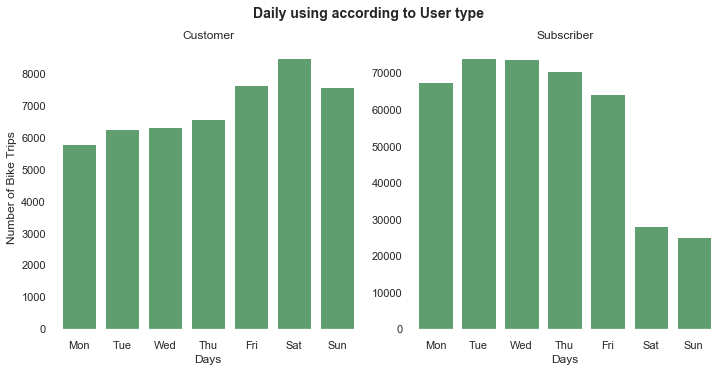

In [56]:
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=ds, x='start_time_day', col="user_type", kind='count', sharey = False, order = day, color = base_color)
g.set_axis_labels("Days", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Daily using according to User type', y=1.03, fontsize=14, fontweight='semibold');

<b> <li> The number of Customers trips was highest at the weekends while Subscribers perfered weekdays

<b> 2. Monthly using according to User type

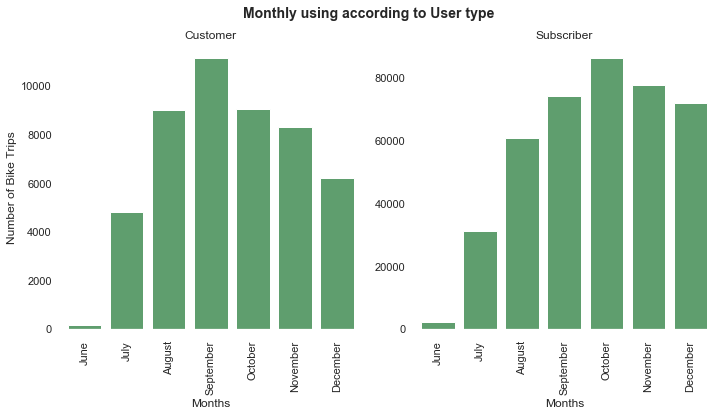

In [57]:
Month = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
g = sb.catplot(data=ds, x='start_time_month', col="user_type", kind='count', sharey = False, order = Month, color = base_color)
g.set_axis_labels("Months", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly using according to User type', y=1.03, fontsize=14, fontweight='semibold');
g.set_xticklabels(rotation=90);

<b> <li> Customers achieved the highest number of trips in Sep while Oct had seen the highest number of trips of Subscribers

<b> 3. Distance according to ages

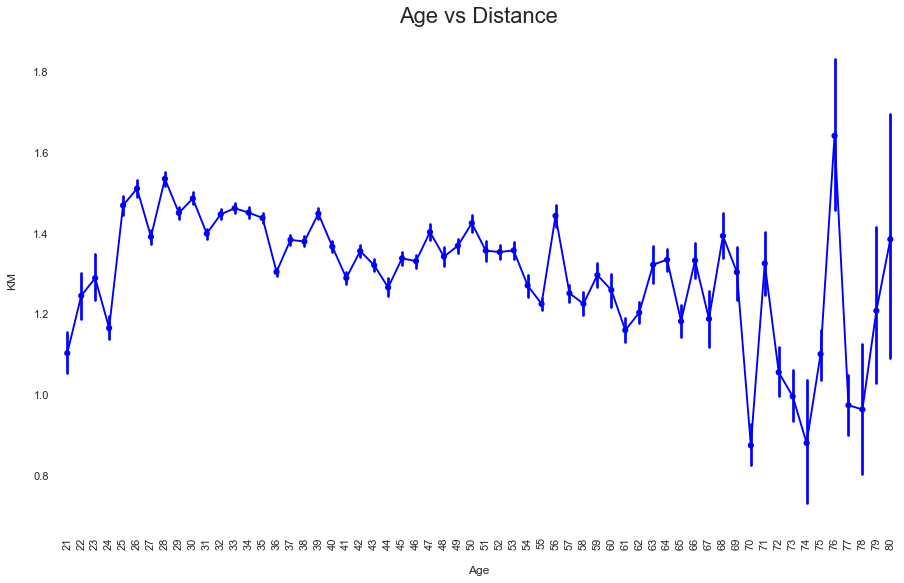

In [48]:
plt.figure(figsize=(15,9))
sb.pointplot(data = ds, x='age', y='distance_km', scale=.7, color='blue')
plt.title('Age vs Distance', fontsize=22, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('KM', labelpad=16)
plt.xticks(rotation = 90);

<b> <li> The graph shows that there was no fixed pattern for using the system by the oldest people. The distance range was between 1.1 and 1.5 km approximately in term of young and adults.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Looking at the bar graph, you can note that there was different usage behaviour between subscribers and customers. The mean of distance for both user types was almost the same.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


The relationship between the members' age and distance was in the range 1.1 to 1.5 km while the oldest had fluctuated pattern reached to 1.7 as max and less 1km as min.

## Multivariate Exploration

<b> 1. Using the system per user type and sex according to days

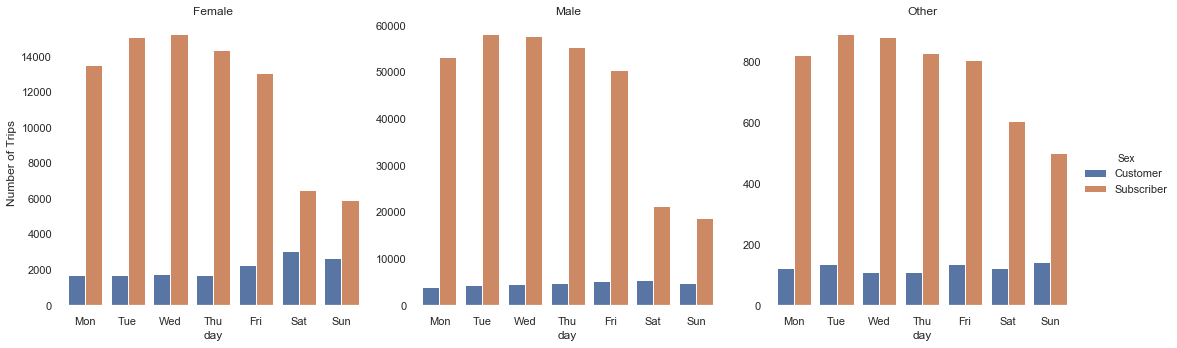

In [59]:
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
u = sb.catplot(data=ds, x='start_time_day', col="member_gender", hue='user_type', kind='count', sharey = False,
                order = day)
u.set_axis_labels("day", "Number of Trips")
u._legend.set_title('Sex')
u.set_titles("{col_name}");

 <b> <li> For weekly usage, male preferred to select subscriber option. The bar chart of a female appeared that there was a number of the female preferred customer. At the weekend, the number of female reached to 2000 approximately.

<b> 2. Using the system per user type and sex according to months

<b> <li> Monthly and weekly usages appeared the same pattern for both sexes. 

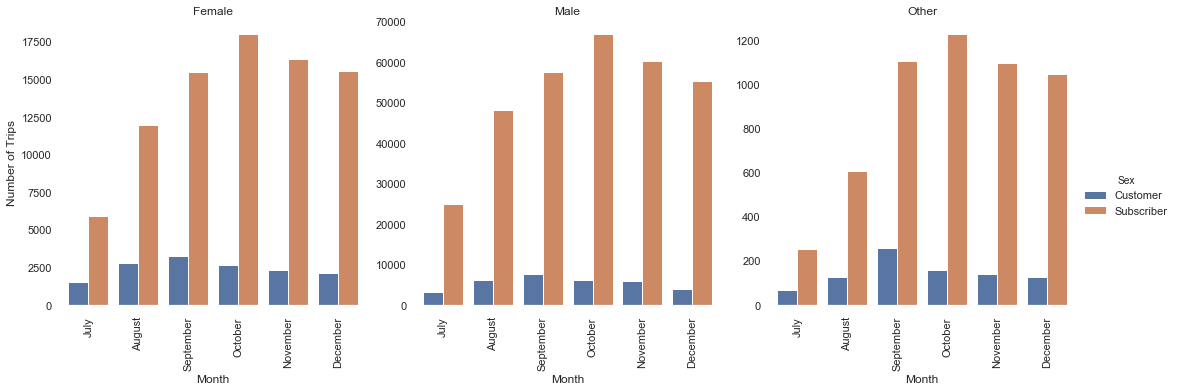

In [60]:
month = ['July', 'August', 'September', 'October', 'November', 'December']
u = sb.catplot(data=ds, x='start_time_month', col="member_gender", hue="user_type", kind='count', sharey = False, order = month)
u.set_axis_labels("Month", "Number of Trips")
u._legend.set_title('Sex')
u.set_titles("{col_name}")
u.set_xticklabels(rotation=90);

 <b> <li> For month usage, the data showes that the majorty of both gender used subscriber.

<b> 3. Monthly Usage during the Weekday for male and female

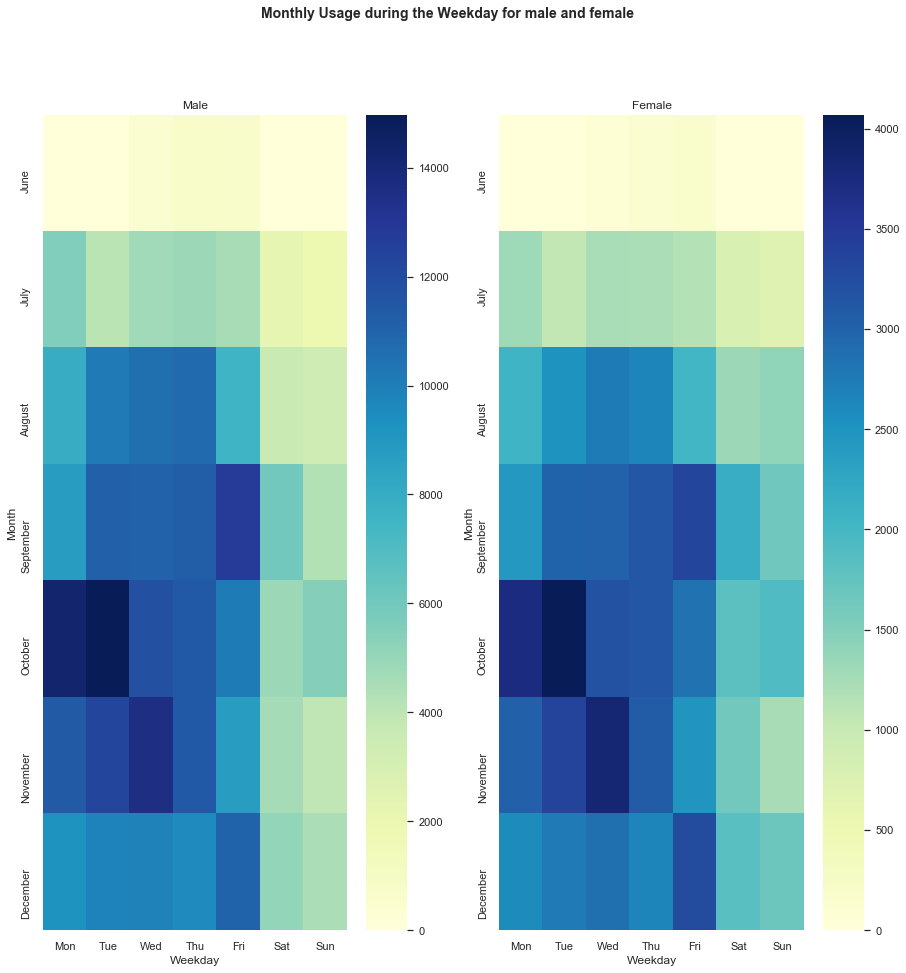

In [51]:
ds['start_time_day'] = pd.Categorical(ds['start_time_day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
ds['start_time_month'] = pd.Categorical(ds['start_time_month'], 
                                                categories=['June', 'July', 'August','September', 'October', 'November', 'December'], 
                                                ordered=True)
plt.figure(figsize=(15,15))
plt.suptitle('Monthly Usage during the Weekday for male and female', fontsize=14, fontweight='semibold')

# heatmap for male
plt.subplot(1, 2, 1)
ds_male = ds.query('member_gender == "Male"').groupby(["start_time_month", "start_time_day"])["bike_id"].size().reset_index()
ds_male= ds_male.pivot("start_time_month", "start_time_day", "bike_id")
sb.heatmap(ds_male, cmap="YlGnBu")

plt.title("Male", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Month');

# heatmap for female

plt.subplot(1, 2, 2)
ds_female = ds.query('member_gender == "Female"').groupby(["start_time_month", "start_time_day"])["bike_id"].size().reset_index()
ds_female= ds_female.pivot("start_time_month", "start_time_day", "bike_id")
sb.heatmap(ds_female, cmap="YlGnBu")

plt.title("Female", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Month');

<b> <li>It was so clear that males tended to use this system a lot (14000 trips) compared to females (4000 trips)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


The graphs show that the pattern usege of male and famale during weekdays and monthes were almost same.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


The heatmap shows that the both genders used the systeme but the number of males'trips was extanted to 14000 trips.  